## Traffic Light Puzzle

The puzzle is made up of four dice with colored dots like a traffic light. The objective of the puzzle is to arrange all four dice so that there will be four different colors on each side – that is, each color appears once on the front, top, back, and bottom. 

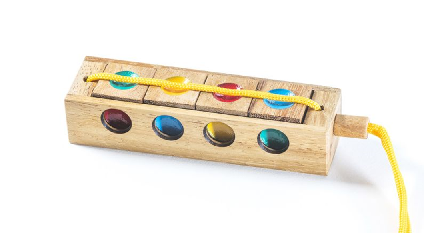

Photo from: https://kubiyagames.com/traffic-light

#### Find at least two lists, where one list corresponds to the front/back and another will correspond to top/bottom of the 4 cubes, such that:

-    Each list has two sides (i.e. front/back or top/bottom) from each cube.
-    Each list can have a maximum of 2 of the same color.
-    The second list (e.g. top/bottom) cannot contain the same sides as the first list (e.g. front/back) 

Reference: [YouTube Video of The Four Cubes Problem](https://www.youtube.com/watch?v=sI7lX3M7OZo&t=220s)

In [ ]:
import pandas as pd
from collections import Counter
import sys
import time
from datetime import datetime, timedelta
from itertools import combinations

In [ ]:
## Create a function to time the entire process
Start_time = time.clock()    

def GetTime():
    sec = timedelta(seconds=(time.clock() - Start_time))
    d = datetime(1,1,1,0) + sec

    x=("%d:%d:%d:%d" % (d.hour, d.minute, d.second,d.microsecond/1000))
    return x

In [ ]:
## To speed up the process and use less memory, I decided to use numbers rather than string. This likely didn't add 
## to much efficiency.
mapping={0:'Blue',1:'Red',2:'Green', 3:'Yellow'}

In [ ]:
## For each cube, I listed the colors on oppiste sides. For example, if the front of the cube was blue and the back was yellow
## then it would have been coded: [0,3]. NOTE: Beacuse it does not matter which side you look at first,
## I always made sure the smaller number was listed first.
## the cubes are listed so that it is top/bottom, front/back,left/right

Cube1=list([[1,1],[1,2],[0,3]])
Cube2=list([[0,1],[1,3],[2,3]])
Cube3=list([[0,1],[0,3],[2,2]])
Cube4=list([[1,2],[2,3],[0,3]])

In [ ]:
## For each cube, I listed the colors on oppiste sides. For example, if the front of the cube was blue and the back was yellow
## then it would have been coded: [0,3]. NOTE: Beacuse it does not matter which side you look at first,
## I always made sure the smaller number was listed first.
## the cubes are listed so that it is top/bottom, front/back,left/right
Cube1=list([['Red','Red'],['Red','Green'],['Blue','Yellow']])
Cube2=list([['Blue','Red'],['Red','Yellow'],['Green','Yellow']])
Cube3=list([['Blue','Red'],['Blue','Yellow'],['Green','Green']])
Cube4=list([['Red','Green'],['Green','Yellow'],['Blue','Yellow']])

### Step 1: Create all possible lists, where each list has a pair of opposite sides from each cube. 

In [ ]:
## Using list comprehension, get all possible ways you can put the 4 cubes together. 
## This produces 81 (3*3*3*3) potential layouts.
n_items=range(0,3)
cubes=[Cube1[i]+Cube2[j]+Cube3[k]+Cube4[l] 
       for i in n_items 
       for j in n_items
       for k in n_items 
       for l in n_items]

print("Possible Layouts: " + str(len(cubes)))
print("\n\x1b[1;30mFirst five layouts: ")
cubes[0:5]

### Step 2: Remove any list that has an element (ie. color) that appears more than 2 times.

In [ ]:
pd.Series(Counter(cubes[0]))

In [ ]:
n=len(cubes)
for i in range(0,n):
    if pd.Series(Counter(cubes[i])).max()>2:
        cubes.remove(cubes[i])
        cubes.insert(0,list())
cubes = [x for x in cubes if x != []]

In [ ]:
## Set of all potential lists that can be used as a solution.
cubes

#### At this point, we have a smaller set of lists that could potentially be the solution to our puzzle. 

### Step 3a: Get a combination of a set of two lists from the remaining potential lists. 
### Step 3b: Only keep the combination of two lists that do not share any common sides
#### At least one combination will be the solution to our puzzle.

In [ ]:
## From the potential layouts left from prior step, see which 
## two layouts that have no edges in common. The First layout 
## will correspond the front/back of the cube, and the second 
## layout will correspond to the top/bottom. 

## NOTE: When the puzzle is sloved, the user will only be able
## to see the front, back, top, and bottom. The left and right
## sides will be hidden.

final=list()
for combo in combinations(cubes, 2):  # 2 for pairs
    works=list()
    for j in (0,2,4,6):
        if combo[0][j:j+2]==combo[1][j:j+2]:
            works+=[0]
        else:
            works+=[1]
    if pd.Series(works).min()>0:
        final+=combo

In [ ]:
final

### Final Step: From the final selected lists, re-organize the list so that the each side is a different color

In [ ]:
def re_organize(list_of_interest):
    for i in range(0,(len(list_of_interest)-1),2):
        for j in range(i+2,len(list_of_interest),2):
            if list_of_interest[i]==list_of_interest[j]:
                ## turn the latter dice 180 degrees up or down
                list_of_interest[j], list_of_interest[j+1] = list_of_interest[j+1], list_of_interest[j]
                

    for i in range(1,(len(list_of_interest)-1),2):
        for j in range(i+2,len(list_of_interest),2):
            if list_of_interest[i]==list_of_interest[j]:
                ## turn the latter dice 180 degrees left or right
                list_of_interest[j], list_of_interest[j-1] = list_of_interest[j-1], list_of_interest[j]  
                
    return list_of_interest

In [ ]:
## Final set of lists that provide a solution to the puzzle.
print(re_organize(final[0]))
print(re_organize(final[1]))


In [ ]:
front_back=pd.Series(re_organize(final[0]))
top_bottom=pd.Series(re_organize(final[1]))
xx=pd.DataFrame({"front_back":front_back,"top_bottom":top_bottom})

#### Print the final solution

In [ ]:

print("\x1b[1;30mCube 1 Front:\x1b[0m",xx.iloc[0,0],", ",
      "\x1b[1;30mTop:\x1b[0m",xx.iloc[0,1],", ",
      "\x1b[1;30mBack:\x1b[0m",xx.iloc[1,0],", ",
      "\x1b[1;30mBottom:\x1b[0m",xx.iloc[1,1])

print("\x1b[1;30mCube 2 Front:\x1b[0m",xx.iloc[2,0],", ",
      "\x1b[1;30mTop:\x1b[0m",xx.iloc[2,1],", ",
      "\x1b[1;30mBack:\x1b[0m",xx.iloc[3,0],", ",
      "\x1b[1;30mBottom:\x1b[0m",xx.iloc[3,1])

print("\x1b[1;30mCube 3 Front:\x1b[0m",xx.iloc[4,0],", ",
      "\x1b[1;30mTop:\x1b[0m",xx.iloc[4,1],", ",
      "\x1b[1;30mBack:\x1b[0m",xx.iloc[5,0],", ",
      "\x1b[1;30mBottom:\x1b[0m",xx.iloc[5,1])

print("\x1b[1;30mCube 4 Front:\x1b[0m",xx.iloc[6,0],", ",
      "\x1b[1;30mTop:\x1b[0m",xx.iloc[6,1],", ",
      "\x1b[1;30mBack:\x1b[0m",xx.iloc[7,0],", ",
      "\x1b[1;30mBottom:\x1b[0m",xx.iloc[7,1],'\n')

In [ ]:
print("\x1b[1;92mTime Elapsed: \x1b[1;92m", '\x1b[1;32m'+(GetTime())+'\x1b[1;32m')